In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 13.7 MB/s 
     |████████████████████████████████| 16.7 MB 23.1 MB/s 
     |████████████████████████████████| 6.3 MB 75.6 MB/s 


In [2]:
!pip install geojson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#import rasterio as rio
#from rasterio import features
from pathlib import Path
import pathlib
import geopandas as gpd
from descartes import PolygonPatch
from PIL import Image
import itertools
import re

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [5]:
%matplotlib inline 

In [6]:
mpl.rcParams['figure.dpi'] = 300 #increase plot resolution
mpl.rcParams['figure.dpi']

300.0

In [12]:
test_raster_path = '/content/drive/MyDrive/BLD00001_PS4_K3A_NIA0276.tif'
test_geojson_path = '/content/drive/MyDrive/SIA/BLD00001_PS3_K3A_NIA0276.json'

test_gdf = gpd.read_file(test_geojson_path)

In [ ]:
# from geopandas import GeoDataFrame as gdf
# import fiona

# gdf.to_file(test_gdf, 'test_gdf.geojson', driver="GeoJSON")

In [ ]:
import json

with open(test_geojson_path, "r") as st_json:
  st_python = json.load(st_json)
st_python

{'features': [{'geometry': {'coordinates': [[31.4347031225,
      30.0413951468,
      0.0],
     [31.4405428056, 30.0414645232, 0.0],
     [31.4404632046, 30.0465452603, 0.0],
     [31.4346232236, 30.0464758698, 0.0]],
    'type': 'Polygon'},
   'properties': {'building_imcoords': '856.2952642894032,1000.8046984782792,828.0083112141339,1024,879.9702141458786,1023.8647145722488,878.740346620867,1015.2556418971668',
    'image_id': 'BLD00001_PS3_K3A_NIA0276.png',
    'ingest_time': '2020-10-27T02:04:23.355595Z',
    'object_imcoords': 'EMPTY',
    'road_imcoords': 'EMPTY',
    'type_id': '2',
    'type_name': '아파트'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[31.4347031225, 30.0413951468, 0.0],
     [31.4405428056, 30.0414645232, 0.0],
     [31.4404632046, 30.0465452603, 0.0],
     [31.4346232236, 30.0464758698, 0.0]],
    'type': 'Polygon'},
   'properties': {'building_imcoords': '821.5515067078223,969.1356097092277,799.4138912576116,1009.1063042721082,798.7989574951057,10

In [ ]:
test_gdf.geom_type

0      None
1      None
2      None
3      None
4      None
       ... 
210    None
211    None
212    None
213    None
214    None
Length: 215, dtype: object

In [ ]:
test_gdf.head()

,object_imcoords,building_imcoords,road_imcoords,image_id,ingest_time,type_id,type_name,geometry
0,EMPTY,"856.2952642894032,1000.8046984782792,828.00831...",EMPTY,BLD00001_PS3_K3A_NIA0276.png,2020-10-27T02:04:23.355595+00:00,2,아파트,None
1,EMPTY,"821.5515067078223,969.1356097092277,799.413891...",EMPTY,BLD00001_PS3_K3A_NIA0276.png,2020-10-27T02:04:23.355595+00:00,2,아파트,None
2,EMPTY,"761.5954648635015,999.8822978345204,747.451988...",EMPTY,BLD00001_PS3_K3A_NIA0276.png,2020-10-27T02:04:23.355595+00:00,2,아파트,None
3,EMPTY,"791.4197523450355,949.7651961902932,767.129868...",EMPTY,BLD00001_PS3_K3A_NIA0276.png,2020-10-27T02:04:23.355595+00:00,2,아파트,None
4,EMPTY,"730.8487767382088,982.3566856031034,707.481293...",EMPTY,BLD00001_PS3_K3A_NIA0276.png,2020-10-27T02:04:23.355595+00:00,2,아파트,None


In [ ]:
test_gdf.describe()

,object_imcoords,building_imcoords,road_imcoords,image_id,ingest_time,type_id,type_name,geometry
count,215,215,215,215,215,215,215,0
unique,1,215,1,1,1,2,2,0
top,EMPTY,"856.2952642894032,1000.8046984782792,828.00831...",EMPTY,BLD00001_PS3_K3A_NIA0276.png,2020-10-27T02:04:23.355595+00:00,2,아파트,NaN
freq,215,1,215,215,215,214,214,NaN


In [ ]:
test_gdf.set_index('type_id',inplace=True)

In [ ]:
test_gdf.head()

,object_imcoords,building_imcoords,road_imcoords,image_id,ingest_time,type_name,geometry
type_id,,,,,,,
2,EMPTY,"856.2952642894032,1000.8046984782792,828.00831...",EMPTY,BLD00001_PS3_K3A_NIA0276.png,2020-10-27T02:04:23.355595+00:00,아파트,None
2,EMPTY,"821.5515067078223,969.1356097092277,799.413891...",EMPTY,BLD00001_PS3_K3A_NIA0276.png,2020-10-27T02:04:23.355595+00:00,아파트,None
2,EMPTY,"761.5954648635015,999.8822978345204,747.451988...",EMPTY,BLD00001_PS3_K3A_NIA0276.png,2020-10-27T02:04:23.355595+00:00,아파트,None
2,EMPTY,"791.4197523450355,949.7651961902932,767.129868...",EMPTY,BLD00001_PS3_K3A_NIA0276.png,2020-10-27T02:04:23.355595+00:00,아파트,None
2,EMPTY,"730.8487767382088,982.3566856031034,707.481293...",EMPTY,BLD00001_PS3_K3A_NIA0276.png,2020-10-27T02:04:23.355595+00:00,아파트,None


In [ ]:
test_gdf.sort_index(inplace=True)

In [ ]:
test_gdf.head()

,object_imcoords,building_imcoords,road_imcoords,image_id,ingest_time,type_name,geometry
type_id,,,,,,,
1,EMPTY,"532.6456985368046,314.92411965791746,549.44221...",EMPTY,BLD00001_PS3_K3A_NIA0276.png,2020-10-27T02:04:23.355595+00:00,소형 시설,None
2,EMPTY,"856.2952642894032,1000.8046984782792,828.00831...",EMPTY,BLD00001_PS3_K3A_NIA0276.png,2020-10-27T02:04:23.355595+00:00,아파트,None
2,EMPTY,"46.285371384929505,351.9284272543778,72.819657...",EMPTY,BLD00001_PS3_K3A_NIA0276.png,2020-10-27T02:04:23.355595+00:00,아파트,None
2,EMPTY,"7.7807305345355635,350.9308976986681,35.512052...",EMPTY,BLD00001_PS3_K3A_NIA0276.png,2020-10-27T02:04:23.355595+00:00,아파트,None
2,EMPTY,"0,462.0171582950109,9.322730082912,457.4641970...",EMPTY,BLD00001_PS3_K3A_NIA0276.png,2020-10-27T02:04:23.355595+00:00,아파트,None


In [ ]:
test_gdf.dtypes

object_imcoords        object
building_imcoords      object
road_imcoords          object
image_id               object
ingest_time            object
type_name              object
geometry             geometry
dtype: object

In [ ]:
test_gdf['geometry']

type_id
1    None
2    None
2    None
2    None
2    None
     ... 
2    None
2    None
2    None
2    None
2    None
Name: geometry, Length: 215, dtype: geometry

In [ ]:
test_gdf['geometry'].isnull()

type_id
1    True
2    True
2    True
2    True
2    True
     ... 
2    True
2    True
2    True
2    True
2    True
Name: geometry, Length: 215, dtype: bool

In [ ]:
import geojson
with open(test_geojson_path) as f:
    gj = geojson.load(f)
features = gj['features'][0]

In [ ]:
features

{"geometry": {"coordinates": [[31.434703, 30.041395, 0.0], [31.440543, 30.041465, 0.0], [31.440463, 30.046545, 0.0], [31.434623, 30.046476, 0.0]], "type": "Polygon"}, "properties": {"building_imcoords": "856.2952642894032,1000.8046984782792,828.0083112141339,1024,879.9702141458786,1023.8647145722488,878.740346620867,1015.2556418971668", "image_id": "BLD00001_PS3_K3A_NIA0276.png", "ingest_time": "2020-10-27T02:04:23.355595Z", "object_imcoords": "EMPTY", "road_imcoords": "EMPTY", "type_id": "2", "type_name": "\uc544\ud30c\ud2b8"}, "type": "Feature"}

In [ ]:
features.keys()

dict_keys(['type', 'geometry', 'properties'])

In [ ]:
features.get("geometry")

{"coordinates": [[31.434703, 30.041395, 0.0], [31.440543, 30.041465, 0.0], [31.440463, 30.046545, 0.0], [31.434623, 30.046476, 0.0]], "type": "Polygon"}

In [ ]:
features['geometry']['coordinates']

[[31.434703, 30.041395, 0.0],
 [31.440543, 30.041465, 0.0],
 [31.440463, 30.046545, 0.0],
 [31.434623, 30.046476, 0.0]]

In [ ]:
features['geometry']['type']

'Polygon'

In [ ]:
features['properties']

{'building_imcoords': '856.2952642894032,1000.8046984782792,828.0083112141339,1024,879.9702141458786,1023.8647145722488,878.740346620867,1015.2556418971668',
 'image_id': 'BLD00001_PS3_K3A_NIA0276.png',
 'ingest_time': '2020-10-27T02:04:23.355595Z',
 'object_imcoords': 'EMPTY',
 'road_imcoords': 'EMPTY',
 'type_id': '2',
 'type_name': '아파트'}

In [ ]:
import json

df = pd.read_json(test_geojson_path)
df.head()


,features,type
0,"{'geometry': {'coordinates': [[31.4347031225, ...",FeatureCollection
1,"{'geometry': {'coordinates': [[31.4347031225, ...",FeatureCollection
2,"{'geometry': {'coordinates': [[31.4347031225, ...",FeatureCollection
3,"{'geometry': {'coordinates': [[31.4347031225, ...",FeatureCollection
4,"{'geometry': {'coordinates': [[31.4347031225, ...",FeatureCollection


In [ ]:
def plot_gdf(gdf,fill=False,ax=None,linewidth=0.2):
    if ax is None:
        _,ax = plt.subplots(1,figsize=(3, 3))
        
    for geom in gdf['geometry']:
        if fill:
            patch = PolygonPatch(geom,linewidth=linewidth,color='fuchsia')
            ax.add_patch(patch)
        else:
            ax.plot(*geom.exterior.xy,linewidth=linewidth)
    return(ax)

AttributeError: ignored

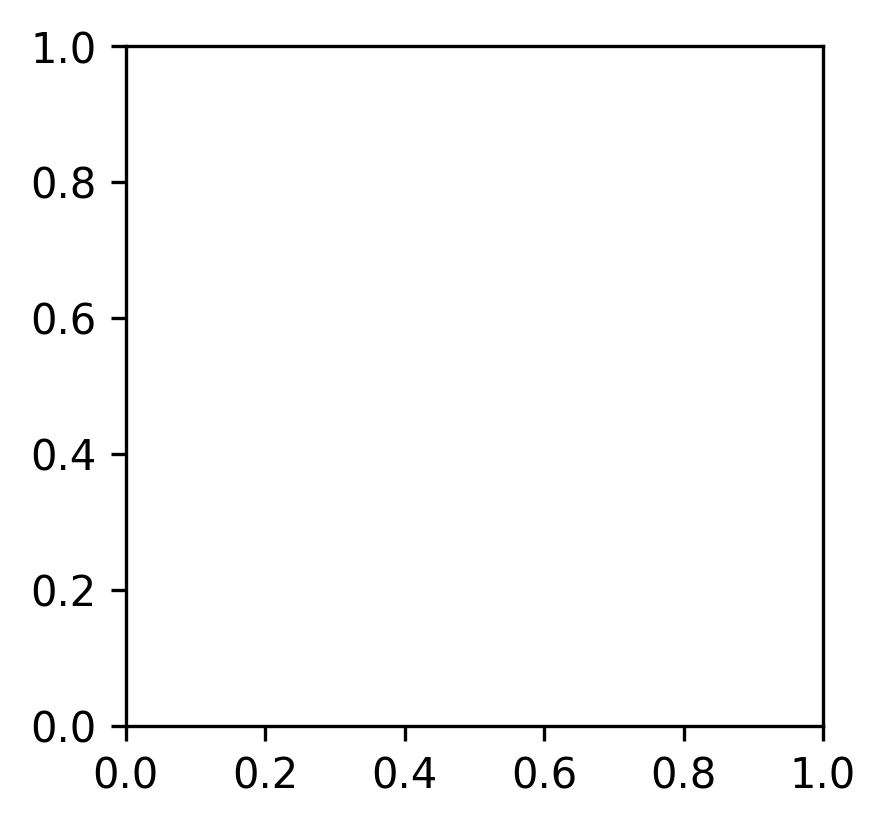

In [ ]:
plot_gdf(test_gdf);